In [4]:
import os
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 'large',
    'figure.dpi': 100,
})

In [18]:
with open('measurements/SDS00001.csv') as file:
    meas = [[float(el) for el in row.rstrip().split(sep)]
            for row in file.readlines()]

In [ ]:
t, U_1, U_2, 

In [ ]:
# Import all measurements from the `./measurements` directory. Each measurement file
# is read into a numpy array (column-first) and added to the `meas_dict` (keys are
# filenames with extentions removed).
meas_dict = {}
suffix, sep = 'dat', '\t'
for fname in glob.glob(f'./measurements/*.{suffix}'):
    with open(fname) as file:
        meas = [[float(el) for el in row.rstrip().split(sep)]
                for row in file.readlines()]
        meas_name, _ = str.rsplit(os.path.basename(fname), '.', maxsplit=1)
        meas_dict[meas_name] = np.array(meas).T

suffix, sep = 'csv', ','
for fname in glob.glob(f'./measurements/*.{suffix}'):
    with open(fname) as file:
        meas = [[float(el) for el in row.rstrip().split(sep)]
                for row in file.readlines()]
        meas_name, _ = str.rsplit(os.path.basename(fname), '.', maxsplit=1)
        meas_dict[meas_name] = np.array(meas).T

In [9]:
meas_dict

{'res-not-connected': array([[4.52500e+04, 4.55000e+04, 4.57500e+04, 4.60000e+04, 4.62500e+04,
         4.65000e+04, 4.67500e+04, 4.70000e+04, 4.72500e+04, 4.75000e+04,
         4.77500e+04, 4.80000e+04, 4.82500e+04, 4.85000e+04, 4.87500e+04,
         4.90000e+04, 4.92500e+04, 4.95000e+04, 4.97500e+04, 5.00000e+04,
         5.02500e+04, 5.05000e+04, 5.07500e+04, 5.10000e+04, 5.12500e+04,
         5.15000e+04, 5.17500e+04, 5.20000e+04, 5.22500e+04, 5.25000e+04,
         5.27500e+04, 5.30000e+04, 5.32500e+04, 5.35000e+04, 5.37500e+04,
         5.40000e+04, 5.42500e+04, 5.45000e+04, 5.47500e+04, 5.50000e+04,
         5.52500e+04, 5.55000e+04, 5.57500e+04, 5.60000e+04, 5.62500e+04,
         5.65000e+04, 5.67500e+04, 5.70000e+04, 5.72500e+04, 5.75000e+04,
         5.77500e+04, 5.80000e+04, 5.82500e+04, 5.85000e+04, 5.87500e+04,
         5.90000e+04, 5.92500e+04, 5.95000e+04, 5.97500e+04, 6.00000e+04,
         6.02500e+04, 6.05000e+04, 6.07500e+04, 6.10000e+04, 6.12500e+04,
         6.15000e

In [ ]:
from matplotlib.ticker import AutoMinorLocator

def process_meas_envelope(meas_name, C, t_slice, t_0=0):
    t, U_1, U_2, step = meas_dict[meas_name]

    # Plot.
    fig, axs = plt.subplots(2, 1, figsize=[6, 7])
    axs[0].scatter(1e6 * t, 1e3 * U_1, marker='o', s=8, color='seagreen', alpha=0.5, label=r'meritve')
    axs[1].scatter(1e6 * t, 1e3 * U_2, marker='o', s=8, color='lightsalmon', alpha=0.5, label=r'meritve')

    # Finds the indicies of maximums in individual slices.
    # In a slice, values of `t` are in $[n t_{slice} - t_0, (n+1) t_{slice} - t_0]$
    # for some nonnegative integer n and a given value of `t_slice`.
    n = 0
    max_indices, min_indices = [], []
    slice_indices = (t > n*t_slice) * (t < (n+1)*t_slice)
    while np.any(slice_indices):
        max_indices.append(np.argmax((U_1 + 10)*slice_indices))
        min_indices.append(np.argmin((U_1 - 10)*slice_indices))
        n += 1
        slice_indices = (t > (n*t_slice - t_0)) * (t < ((n+1)*t_slice - t_0))
    
    axs[0].scatter(1e6 * t[max_indices], 1e3 * U_1[max_indices], marker='o', s=8, color='tab:red')
    axs[0].scatter(1e6 * t[min_indices], 1e3 * U_1[min_indices], marker='o', s=8, color='tab:red')
    
    # Do the same for U_2
    n = 0
    max_indices, min_indices = [], []
    slice_indices = (t > n*t_slice) * (t < (n+1)*t_slice)
    while np.any(slice_indices):
        max_indices.append(np.argmax((U_2 + 10)*slice_indices))
        min_indices.append(np.argmin((U_2 - 10)*slice_indices))
        n += 1
        slice_indices = (t > (n*t_slice - t_0)) * (t < ((n+1)*t_slice - t_0))
    
    axs[1].scatter(1e6 * t[max_indices], 1e3 * U_2[max_indices], marker='o', s=8, color='tab:red')
    axs[1].scatter(1e6 * t[min_indices], 1e3 * U_2[min_indices], marker='o', s=8, color='tab:red')

    for i, ax in enumerate(axs):
        ax.set_title(f'Potek $U_{i+1}$ pri $C_0 = {1e12 * C:.0f}\\,\\mathrm{{pF}}$')
        ax.set_xlim(1e6 * -30e-6, 1e6 * 600e-6)
        ax.set_xlabel(r'$t\,[\mathrm{\mu s}]$')
        ax.set_ylabel(r'$U\,[\mathrm{mV}]$')
        ax.legend()
        ax.set_axisbelow(True)
        ax.grid()
        ax.grid(which='minor', linestyle=':')
        ax.xaxis.set_minor_locator(AutoMinorLocator(10))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    fig.tight_layout()
    fig.savefig(f'U-by-t-{1e12 * C:.0f}.pdf')

In [ ]:
def ω_calc(N, Nt_0, ΔNt_0):
    return 2*np.pi*N / Nt_0, 2*np.pi*N / (Nt_0)**2 * ΔNt_0

# U_1
ω, Δω = ω_calc(15, 230e-6, 5e-6)
ω, Δω = ω_calc(37, 570e-6, 5e-6)
ω, Δω = ω_calc(36, 580e-6, 5e-6)
ω, Δω = ω_calc(32, 530e-6, 5e-6)
ω, Δω = ω_calc(33, 540e-6, 5e-6)
# U_2
ω, Δω = ω_calc(16, 240e-6, 5e-6)
ω, Δω = ω_calc(30, 440e-6, 5e-6)
ω, Δω = ω_calc(30, 460e-6, 5e-6)
1e-6 * ω, 1e-6 * Δω

In [ ]:
def Δω_β_calc(T_0, ΔT_0, U_0, ΔU_0, U_T_0, ΔU_T_0):
    Δω = 2*np.pi / T_0
    ΔΔω = 2*np.pi / T_0**2 * ΔT_0
    β = 1/T_0 * np.log(U_0 / U_T_0)
    Δβ = np.sqrt(
        (1/T_0**2 * np.log(U_0 / U_T_0) * ΔT_0)**2 +
        (1/T_0 * 1/U_0 * ΔU_0)**2 +
        (1/T_0 * 1/U_T_0 * ΔU_T_0)**2
    )
    return Δω, ΔΔω, β, Δβ

# U_1
Δω, ΔΔω, β, Δβ = Δω_β_calc(230e-6, 5e-6, 8.5e-3, 0.2e-3, 1.0e-3, 0.2e-3)
Δω, ΔΔω, β, Δβ = Δω_β_calc(250e-6, 5e-6, 8.4e-3, 0.2e-3, 1.2e-3, 0.2e-3)
Δω, ΔΔω, β, Δβ = Δω_β_calc(155e-6, 3e-6, 8.0e-3, 0.2e-3, 2.8e-3, 0.2e-3)
Δω, ΔΔω, β, Δβ = Δω_β_calc(116e-6, 1e-6, 8.2e-3, 0.2e-3, 4.2e-3, 0.2e-3)
Δω, ΔΔω, β, Δβ = Δω_β_calc(93e-6, 1e-6, 7.6e-3, 0.2e-3, 4.6e-3, 0.2e-3)
# U_2
Δω, ΔΔω, β, Δβ = Δω_β_calc(2*120e-6, 20e-6, 1, 1, 1, 1)
Δω, ΔΔω, β, Δβ = Δω_β_calc(310e-6, 10e-6, 4.2e-3, 0.1e-3, 0.8e-3, 0.1e-3)
Δω, ΔΔω, β, Δβ = Δω_β_calc(175e-6, 5e-6, 5.4e-3, 0.2e-3, 2.0e-3, 0.2e-3)
Δω, ΔΔω, β, Δβ = Δω_β_calc(120e-6, 2e-6, 6.0e-3, 0.1e-3, 3.0e-3, 0.2e-3)
Δω, ΔΔω, β, Δβ = Δω_β_calc(95e-6, 2e-6, 6.4e-3, 0.2e-3, 3.8e-3, 0.2e-3)
1e-3 * Δω, 1e-3 * ΔΔω, 1e-3 * β, 1e-3 * Δβ

In [ ]:
process_meas_envelope('SDS00001', 150e-12, 16e-6)
process_meas_envelope('SDS00002', 330e-12, 16e-6)
process_meas_envelope('SDS00003', 560e-12, 16e-6)
process_meas_envelope('SDS00004', 820e-12, 16e-6)
process_meas_envelope('SDS00005', 1150e-12, 16e-6)

In [ ]:
def process_meas_res(ax, meas_name, C, i, color):
    ν, U_0 = meas_dict[meas_name][:,:-1]
    ω = 2*np.pi * ν
    ax.plot(
        1e-6 * ω, 1e3 * U_0, color=color,
        label=f'$U_{i}$ za ' + (f'${1e12 * C:.0f}\\,\\mathrm{{pF}}$' if C != 0 else 'nepovezana kroga'),
        marker='o', markersize=4, markerfacecoloralt='white',
        fillstyle=('full' if i == 1 else 'none'))
    
    ω_tresh = 0.43e6
    max_indices = [np.argmax(U_0 * (ω < ω_tresh)),
                   np.argmax(U_0 * (ω > ω_tresh))]
    ax.plot(1e-6 * ω[max_indices], 1e3 * U_0[max_indices], color='black', linestyle='none',
            marker='o', markersize=5, markerfacecoloralt='white', fillstyle='none', zorder=10)
    n = max_indices[0]

    if i == 1:
        ω_1, ω_2 = ω[max_indices]
        n, m = max_indices
        Δω_1, Δω_2 = np.mean(np.diff(ω[n-1:n+2])), np.mean(np.diff(ω[m-1:m+2]))
        print(f'${1e12 * C:.0f}$ & ${1e-6 * ω_1:.3f} \\pm {1e-6 * Δω_1:.3f}$ & ${1e-6 * ω_2:.3f} \\pm {1e-6 * Δω_2:.3f}$ \\\\')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[6, 6])

process_meas_res(ax, 'res-not-connected', 0, 1, 'tab:red')
process_meas_res(ax, 'res-U_1-at-150', 150e-12, 1, 'tab:orange')
process_meas_res(ax, 'res-U_2-at-150', 150e-12, 2, 'tab:orange')
process_meas_res(ax, 'res-U_1-at-330', 330e-12, 1, 'tab:green')
process_meas_res(ax, 'res-U_2-at-330', 330e-12, 2, 'tab:green')
process_meas_res(ax, 'res-U_1-at-560', 560e-12, 1, 'tab:blue')
process_meas_res(ax, 'res-U_2-at-560', 560e-12, 2, 'tab:blue')
process_meas_res(ax, 'res-U_1-at-820', 820e-12, 1, 'tab:purple')
process_meas_res(ax, 'res-U_1-at-1150', 1150e-12, 1, 'rebeccapurple')

ax.set_title(f'Resonančne krivulje pri različnih sklopitvah')
ax.set_xlabel(r'$\omega\,[\mathrm{\mu s^{-1}}]$')
ax.set_ylabel(r'$U_\mathrm{RMS}\,[\mathrm{mV}]$')
ax.legend()
fig.tight_layout()
fig.savefig(f'res.pdf')

0.42568580456141697
0.012566370614359154
6.283185307179577
(33.87500000000005, 0.15915494309189557)


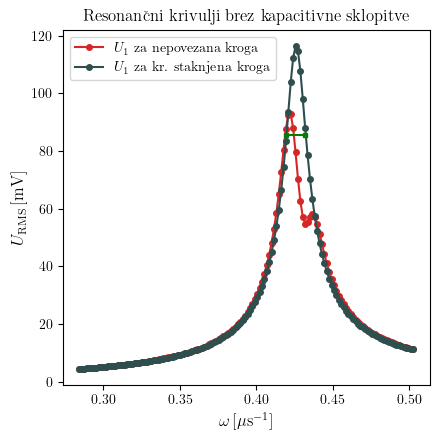

In [22]:
fig, ax = plt.subplots(1, 1, figsize=[4.5, 4.5])

# Not-connected
ν, U_0 = meas_dict['res-not-connected'][:,:-1]
ω = 2*np.pi * ν

ax.plot(1e-6 * ω, 1e3 * U_0, color='tab:red',
        marker='o', markersize=4, label=f'$U_1$ za nepovezana kroga')

# Shorted
ν, U_0 = meas_dict['res-short'][:,:-1]
ω = 2*np.pi * ν
max_i = np.argmax(U_0)
ω_1, Δω_1 = ω[max_i], 0.002e6
print(1e-6 * ω_1)

# Calculate FWHM for U_RMS^2
U_0_max = np.max(U_0)
s = np.flatnonzero(U_0 > U_0_max/np.sqrt(2))
i_L, i_R = s[0], s[-1]
Δω, ΔΔω = ω[i_R] - ω[i_L], 0.002e-6
print(1e-6 * Δω)
print(1e-3 * Δω/2)

Q = ω_1 / Δω
ΔQ = np.sqrt(
    (1 / Δω * Δω_1)**2 + 
    (ω_1 / Δω**2 * ΔΔω)**2
)
print((Q, ΔQ))

ax.plot([1e-6 * ω[i_L], 1e-6 * ω[i_R]], [1e3 * (U_0[i_L] + U_0[i_R])/2]*2, color='green',
        marker='s', markersize=3, zorder=10)

ax.plot(1e-6 * ω, 1e3 * U_0, color='darkslategrey', marker='o', markersize=4,
        label=f'$U_1$ za kr. staknjena kroga')

ax.set_title(f'Resonančni krivulji brez kapacitivne sklopitve')
ax.set_xlabel(r'$\omega\,[\mathrm{\mu s^{-1}}]$')
ax.set_ylabel(r'$U_\mathrm{RMS}\,[\mathrm{mV}]$')
ax.legend()
fig.tight_layout()
fig.savefig(f'res-no-cap.pdf')